In [13]:
from __future__ import (unicode_literals, print_function, absolute_import,
                        division)


from ema_workbench import (Model, MultiprocessingEvaluator, Policy,
                           Scenario, IntegerParameter)
from ema_workbench.em_framework.evaluators import BaseEvaluator

from ema_workbench.em_framework.evaluators import perform_experiments
from ema_workbench.em_framework.optimization import (HyperVolume,
                                                     EpsilonProgress)
from ema_workbench.em_framework.samplers import sample_uncertainties
from ema_workbench.util import ema_logging
import time
from problem_formulation import get_model_for_problem_formulation
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt


In [14]:
if __name__ == '__main__':
    ema_logging.log_to_stderr(ema_logging.INFO)

    model, steps = get_model_for_problem_formulation(3)

    reference_values = {'Bmax': 175, 'Brate': 1.5, 'pfail': 0.5,
                        'discount rate 0': 3.5, 'discount rate 1': 3.5,
                        'discount rate 2': 3.5,
                        'ID flood wave shape': 4}
    scen1 = {}

    for key in model.uncertainties:
        name_split = key.name.split('_')

        if len(name_split) == 1:
            scen1.update({key.name: reference_values[key.name]})

        else:
            scen1.update({key.name: reference_values[name_split[1]]})

    ref_scenario = Scenario('reference', **scen1)

In [4]:
#Run scenarios ansd policies random
with MultiprocessingEvaluator(dike_model) as evaluator:
        results = evaluator.perform_experiments(2, 2)

[MainProcess/INFO] pool started
[MainProcess/INFO] performing 2 scenarios * 2 policies * 1 model(s) = 4 experiments
[MainProcess/INFO] 1 cases completed
[MainProcess/INFO] 2 cases completed
[MainProcess/INFO] 3 cases completed
[MainProcess/INFO] 4 cases completed
[MainProcess/INFO] experiments finished
[MainProcess/INFO] terminating pool


In [17]:

convergence_metrics = [EpsilonProgress()]

espilon = [1e3] * len(model.outcomes)
#espilon = [1000000 ,1, 1000000,1,  1000000,1,1000000,1,1000000,1, 1000000,1000000]   

nfe = 5000 # 200 proof of principle only, way to low for actual use

with MultiprocessingEvaluator(model) as evaluator:
        results, convergence = evaluator.optimize(nfe=nfe, searchover='levers',
                                                  epsilons=espilon,
                                                  convergence=convergence_metrics,
                                                  reference=ref_scenario)

[MainProcess/INFO] pool started
[MainProcess/INFO] generation 0: 0/5000 nfe
[MainProcess/INFO] generation 5: 498/5000 nfe
[MainProcess/INFO] generation 10: 994/5000 nfe
[MainProcess/INFO] generation 15: 1494/5000 nfe
[MainProcess/INFO] generation 20: 1994/5000 nfe
[MainProcess/INFO] generation 25: 2492/5000 nfe
[MainProcess/INFO] generation 30: 2988/5000 nfe
[MainProcess/INFO] generation 35: 3488/5000 nfe
[MainProcess/INFO] generation 40: 3985/5000 nfe
[MainProcess/INFO] generation 45: 4484/5000 nfe
[MainProcess/INFO] generation 50: 4979/5000 nfe
[MainProcess/INFO] optimization completed, found 338 solutions
[MainProcess/INFO] terminating pool


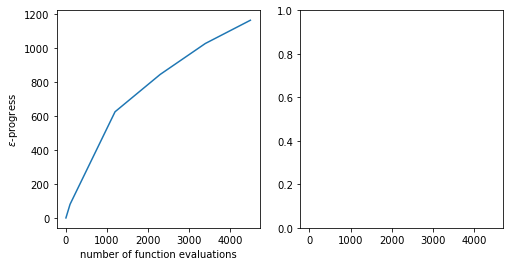

In [22]:
fig, (ax1, ax2) = plt.subplots(ncols=2, sharex=True, figsize=(8,4))
ax1.plot(convergence.nfe, convergence.epsilon_progress)
ax1.set_ylabel('$\epsilon$-progress')
ax1.set_xlabel('number of function evaluations')
plt.show()

In [28]:
results.keys()

int_outcomes = results_1[results_1['0_RfR 0']= 0]


SyntaxError: invalid syntax (<ipython-input-28-e2383e961cf9>, line 3)

In [15]:
dike_model.outcomes.keys()

odict_keys(['A.1 Total Costs', 'A.1_Expected Number of Deaths', 'A.2 Total Costs', 'A.2_Expected Number of Deaths', 'A.3 Total Costs', 'A.3_Expected Number of Deaths', 'A.4 Total Costs', 'A.4_Expected Number of Deaths', 'A.5 Total Costs', 'A.5_Expected Number of Deaths', 'RfR Total Costs', 'Expected Evacuation Costs'])